# Initial steps

Import Pandas library using the short name 'pd':

In [1]:
import pandas as pd

## Download the data

We are going to use the data provided by the [United Nations Refugee Agency](http://popstats.unhcr.org/en/overview).

## Load the data that is in a CSV file

In [48]:
imigration_data = pd.read_csv('/home/walrus/unhcr_popstats_export_persons_of_concern_all_data.csv')

CParserError: Error tokenizing data. C error: Expected 2 fields in line 4, saw 11


We have an error? Why?

    CParserError: Error tokenizing data. C error: Expected 2 fields in line 4, saw 11
    
Let's see the first lines of outr csv file:

In [49]:
!head unhcr_popstats_export_persons_of_concern_all_data.csv

"Extracted from the UNHCR Population Statistics Reference Database","United Nations High Commissioner for Refugees"
"Date extracted: 2015-09-18 04:36:55 +02:00"

Year,"Country / territory of asylum/residence",Origin,"Refugees (incl. refugee-like situations)","Asylum-seekers (pending cases)","Returned refugees","Internally displaced persons (IDPs)","Returned IDPs","Stateless persons","Others of concern","Total Population"
1951,Australia,Various/Unknown,180000,,,,,,,180000
1951,Austria,Various/Unknown,282000,,,,,,,282000
1951,Belgium,Various/Unknown,55000,,,,,,,55000
1951,Canada,Various/Unknown,168511,,,,,,,168511
1951,Switzerland,Various/Unknown,10000,,,,,,,10000
1951,Germany,Various/Unknown,265000,,,,,,,265000


Ok, the problem is that we are interested only in the data below the fourth line of the csv file. We need to ignore the 3 first lines. We can do this passing the argument 'header' to the pandas function read_csv:

In [79]:
imigration_data = pd.read_csv('/home/walrus/unhcr_popstats_export_persons_of_concern_all_data.csv', header=2)

/home/walrus/.virtualenvs/py3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
imigration_data

Year Country / territory of asylum/residence  \
0       1951                               Australia   
1       1951                                 Austria   
2       1951                                 Belgium   
3       1951                                  Canada   
4       1951                             Switzerland   
5       1951                                 Germany   
6       1951                                 Denmark   
7       1951                                   Spain   
8       1951                                  France   
9       1951                          United Kingdom   
10      1951                                  Greece   
11      1951                    China, Hong Kong SAR   
12      1951                                   Italy   
13      1951                              Luxembourg   
14      1951                                 Morocco   
15      1951                             Netherlands   
16      1951                                  Norway   
17      1951                                  Sweden   
18      1951                                 Tunisia   
19      1951                                  Turkey   
20      1951                United States of America   
21      1951                         Various/Unknown   
22      1952                                 Austria   
23      1952                                 Belgium   
24      1952                                  Canada   
25      1952                             Switzerland   
26      1952                                 Germany   
27      1952                                 Denmark   
28      1952                                  France   
29      1952                          United Kingdom   
...      ...                                     ...   
103716  2014                                  Zambia   
103717  2014                                  Zambia   
103718  2014                                  Zambia   
103719  2014                                  Zambia   
103720  2014                                  Zambia   
103721  2014                                  Zambia   
103722  2014                                  Zambia   
103723  2014                                  Zambia   
103724  2014                                  Zambia   
103725  2014                                  Zambia   
103726  2014                                  Zambia   
103727  2014                                  Zambia   
103728  2014                                Zimbabwe   
103729  2014                                Zimbabwe   
103730  2014                                Zimbabwe   
103731  2014                                Zimbabwe   
103732  2014                                Zimbabwe   
103733  2014                                Zimbabwe   
103734  2014                                Zimbabwe   
103735  2014                                Zimbabwe   
103736  2014                                Zimbabwe   
103737  2014                                Zimbabwe   
103738  2014                                Zimbabwe   
103739  2014                                Zimbabwe   
103740  2014                                Zimbabwe   
103741  2014                                Zimbabwe   
103742  2014                                Zimbabwe   
103743  2014                                Zimbabwe   
103744  2014                                Zimbabwe   
103745  2014                                Zimbabwe   

                                       Origin  \
0                             Various/Unknown   
1                             Various/Unknown   
2                             Various/Unknown   
3                             Various/Unknown   
4                             Various/Unknown   
5                             Various/Unknown   
6                             Various/Unknown   
7                             Various/Unknown   
8                             Various/Unknown   
9                             Various/Unknown

Now we have our data! You can see that we have a lot o 'NaN' values. This means 'Not a Number', and exist when the content in the cell is empty or something not recognized as a number. A lot of times you will need to take care of this kind of data in different ways like:

 * Removing the lines with this data
 * Converting NaN to some default value, like 0
 
## Cleaning the data

In [81]:
imigration_data.groupby('Country / territory of asylum/residence')['Total Population'].sum()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

Another error above. What happened? Look at the last line of the error message:

    TypeError: unsupported operand type(s) for +: 'int' and 'str'
    
We are trying to mix numbers with strings (words/text data). Probably this happened because our csv file has in the column 'Total Population' values that are not numbers. Let's see what are the types that Pandas is using for our csv file:

In [82]:
imigration_data.dtypes

Year                                          int64
Country / territory of asylum/residence      object
Origin                                       object
Refugees (incl. refugee-like situations)     object
Asylum-seekers (pending cases)               object
Returned refugees                            object
Internally displaced persons (IDPs)         float64
Returned IDPs                               float64
Stateless persons                            object
Others of concern                            object
Total Population                             object
dtype: object

Aha! We can see that the column 'Total Population' is being identified like a 'object' column, instead of a column just with numbers (like 'float64', one of the many types possible for columns with numbers). 

We will need to convert this column to numbers. Luckly, Pandas has functions to help with it, like the function ['to_numeric'](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html). We can try use with our column like:

In [83]:
pd.to_numeric(imigration_data['Total Population'])

ValueError: Unable to parse string "*" at position 97054

And we receive a errror message:

    ValueError: Unable to parse string "*" at position 97054
    
That give exactly the line where the error happened (97054). We can ask Pandas to ignore values in the convertion that are not numbers, using the argument 'errors="corce"':

In [85]:
pd.to_numeric(imigration_data['Total Population'], errors='coerce')

0         180000.0
1         282000.0
2          55000.0
3         168511.0
4          10000.0
5         265000.0
6           2000.0
7           2000.0
8         290000.0
9         208000.0
10         18000.0
11         30000.0
12         26500.0
13          1800.0
14          3000.0
15         14200.0
16          2500.0
17         44000.0
18          2000.0
19          2700.0
20        350000.0
21        158800.0
22        238200.0
23         53500.0
24        154828.0
25          9800.0
26        240000.0
27          1800.0
28        280000.0
29        200000.0
            ...   
103716         NaN
103717         6.0
103718      6175.0
103719        40.0
103720         NaN
103721      2610.0
103722         NaN
103723        11.0
103724         9.0
103725       115.0
103726         NaN
103727         8.0
103728         NaN
103729       658.0
103730         9.0
103731      7453.0
103732        14.0
103733        20.0
103734        16.0
103735        72.0
103736         NaN
103737      

And now, it worked! But we want to change the value in our initial Dataframe. For this we can use:

In [100]:
imigration_data.loc[:, 'Total Population'] = pd.to_numeric(imigration_data['Total Population'], errors='coerce')

## Grouping the data

First we group by country and ask for the 'Total Population':

In [103]:
list(imigration_data.groupby('Country / territory of asylum/residence')['Total Population'])

[('Afghanistan', 4807          50.0
  5396          38.0
  6059       60000.0
  6060          25.0
  6861       15000.0
  6862          23.0
  6863           8.0
  6864           1.0
  6865       32100.0
  8379      332200.0
  8380           4.0
  8381           3.0
  8382           1.0
  8383       37449.0
  10155     159600.0
  10156          3.0
  10157          2.0
  10158      20938.0
  12079     273840.0
  12080          3.0
  12081          3.0
  12082      20152.0
  14288     300795.0
  14289          2.0
  14290          3.0
  14291      10257.0
  16849     325800.0
  16850       1057.0
  16851        136.0
  16852          1.0
             ...    
  66922          3.0
  72498    1193523.0
  72499         51.0
  72500          6.0
  72501       6407.0
  78401    1474167.0
  78402         59.0
  78403          4.0
  78404       6447.0
  84388    1384504.0
  84389         49.0
  84390          4.0
  84391      16184.0
  84392          1.0
  90549     928602.0
  90550         54.

What happened is that we grouped all the different data for each country in a new Dataframe. We can see this below:

In [118]:
for country, country_data in imigration_data.groupby('Country / territory of asylum/residence')[['Year','Total Population']]:
    print(country_data)

       Year Country / territory of asylum/residence                  Origin  \
4807   1990                             Afghanistan         Various/Unknown   
5396   1991                             Afghanistan         Various/Unknown   
6059   1992                             Afghanistan              Tajikistan   
6060   1992                             Afghanistan         Various/Unknown   
6861   1993                             Afghanistan             Afghanistan   
6862   1993                             Afghanistan  Iran (Islamic Rep. of)   
6863   1993                             Afghanistan                    Iraq   
6864   1993                             Afghanistan             Palestinian   
6865   1993                             Afghanistan              Tajikistan   
8379   1994                             Afghanistan             Afghanistan   
8380   1994                             Afghanistan  Iran (Islamic Rep. of)   
8381   1994                             Afghanistan 

We can ask Pandas to sum all values in the column 'Total Population' for each country using the methos ['sum'](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html):

In [120]:
imigration_data.groupby('Country / territory of asylum/residence')['Total Population'].sum()

Country / territory of asylum/residence
Afghanistan                                  13015633.0
Albania                                        510907.0
Algeria                                       5598640.0
Angola                                        2982096.0
Antigua and Barbuda                                 5.0
Argentina                                      713964.0
Armenia                                       4547253.0
Aruba                                              18.0
Australia                                     4230571.0
Austria                                       3705648.0
Azerbaijan                                   15381125.0
Bahamas                                          2429.0
Bahrain                                          7156.0
Bangladesh                                    3836939.0
Barbados                                            2.0
Belarus                                        900344.0
Belgium                                       2297694.0
Belize  

But we have now the data organized in alphabetical order of the countries names. We can order this data based on the number values using the method ['sort_values'](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html):

In [121]:
imigration_data.groupby('Country / territory of asylum/residence')['Total Population'].sum().sort_values()

Country / territory of asylum/residence
Bonaire                                         1.0
Saint Vincent and the Grenadines                2.0
State of Palestine                              2.0
Barbados                                        2.0
Saint Kitts and Nevis                           3.0
Antigua and Barbuda                             5.0
Grenada                                         6.0
Micronesia (Federated States of)                6.0
Tonga                                          12.0
British Virgin Islands                         15.0
Palau                                          18.0
Aruba                                          18.0
Vanuatu                                        21.0
Sint Maarten (Dutch part)                      23.0
Montserrat                                     24.0
Saint Lucia                                    33.0
Turks and Caicos Islands                       38.0
Mauritius                                      57.0
Haiti                   

Too much data? Let's see only the first 10 countries:

In [122]:
imigration_data.groupby('Country / territory of asylum/residence')['Total Population'].sum().sort_values()[:10]

Country / territory of asylum/residence
Bonaire                              1.0
Saint Vincent and the Grenadines     2.0
State of Palestine                   2.0
Barbados                             2.0
Saint Kitts and Nevis                3.0
Antigua and Barbuda                  5.0
Grenada                              6.0
Micronesia (Federated States of)     6.0
Tonga                               12.0
British Virgin Islands              15.0
Name: Total Population, dtype: float64

Another small problem here. Pandas has sorted in ascending order. This means that the first values will be the smaller ones. There are two simple ways of solving this. First using Python indexing to print the last 10 values of the Dataframe using negative indices:

In [132]:
imigration_data.groupby('Country / territory of asylum/residence')['Total Population'].sum().sort_values()[-11:]

Country / territory of asylum/residence
Various/Unknown             22432496.0
Somalia                     23262540.0
Iraq                        23669663.0
Syrian Arab Rep.            26610407.0
Germany                     31037123.0
United States of America    34079370.0
Sudan                       37057849.0
Colombia                    42686445.0
Dem. Rep. of the Congo      47424218.0
Iran (Islamic Rep. of)      69660093.0
Pakistan                    84007133.0
Name: Total Population, dtype: float64

Or we could have used the argument 'ascending' for pandas 'sum' method:

In [133]:
imigration_data.groupby('Country / territory of asylum/residence')['Total Population'].sum().sort_values(ascending=False)[:10]

Country / territory of asylum/residence
Pakistan                    84007133.0
Iran (Islamic Rep. of)      69660093.0
Dem. Rep. of the Congo      47424218.0
Colombia                    42686445.0
Sudan                       37057849.0
United States of America    34079370.0
Germany                     31037123.0
Syrian Arab Rep.            26610407.0
Iraq                        23669663.0
Somalia                     23262540.0
Name: Total Population, dtype: float64

## Plotting the numbers

In [135]:
import matplotlib
matplotlib.style.use('ggplot')

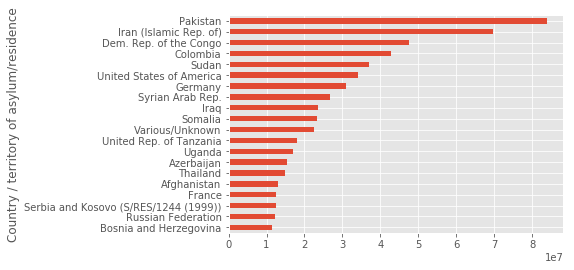

In [137]:
imigration_data.groupby('Country / territory of asylum/residence')['Total Population'].sum().sort_values()[-20:].plot.barh()

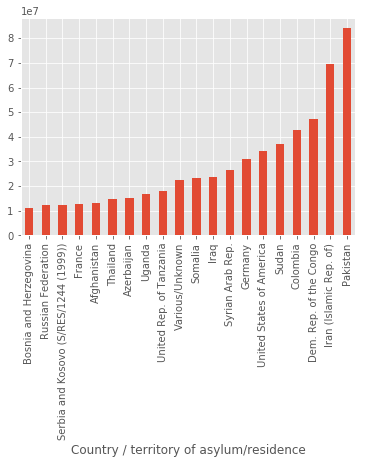

In [138]:
imigration_data.groupby('Country / territory of asylum/residence')['Total Population'].sum().sort_values()[-20:].plot.bar()

## Filtering the data

In [141]:
img_to_germany = imigration_data[imigration_data['Country / territory of asylum/residence'] == 'Germany']
img_to_germany

Year Country / territory of asylum/residence  \
5      1951                                 Germany   
26     1952                                 Germany   
44     1953                                 Germany   
62     1954                                 Germany   
83     1955                                 Germany   
100    1956                                 Germany   
117    1957                                 Germany   
134    1958                                 Germany   
153    1959                                 Germany   
173    1960                                 Germany   
195    1961                                 Germany   
221    1962                                 Germany   
249    1963                                 Germany   
282    1964                                 Germany   
326    1965                                 Germany   
377    1966                                 Germany   
431    1967                                 Germany   
493    1968                                 Germany   
567    1969                                 Germany   
655    1970                                 Germany   
764    1971                                 Germany   
871    1972                                 Germany   
985    1973                                 Germany   
1080   1974                                 Germany   
1181   1975                                 Germany   
1292   1976                                 Germany   
1395   1977                                 Germany   
1531   1978                                 Germany   
1683   1979                                 Germany   
1851   1980                                 Germany   
...     ...                                     ...   
98857  2014                                 Germany   
98858  2014                                 Germany   
98859  2014                                 Germany   
98860  2014                                 Germany   
98861  2014                                 Germany   
98862  2014                                 Germany   
98863  2014                                 Germany   
98864  2014                                 Germany   
98865  2014                                 Germany   
98866  2014                                 Germany   
98867  2014                                 Germany   
98868  2014                                 Germany   
98869  2014                                 Germany   
98870  2014                                 Germany   
98871  2014                                 Germany   
98872  2014                                 Germany   
98873  2014                                 Germany   
98874  2014                                 Germany   
98875  2014                                 Germany   
98876  2014                                 Germany   
98877  2014                                 Germany   
98878  2014                                 Germany   
98879  2014                                 Germany   
98880  2014                                 Germany   
98881  2014                                 Germany   
98882  2014                                 Germany   
98883  2014                                 Germany   
98884  2014                                 Germany   
98885  2014                                 Germany   
98886  2014                                 Germany   

                                   Origin  \
5                         Various/Unknown   
26                        Various/Unknown   
44                        Various/Unknown   
62                        Various/Unknown   
83                        Various/Unknown   
100                       Various/Unknown   
117                       Various/Unknown   
134                       Various/Unknown   
153                       Various/Unknown   
173                       Various/Unknown   
195                       Various/Unknown   
221                       Various/Unknown   
249        

If we want to add another filter, we can do it like below:

In [143]:
img_to_germany = imigration_data[(imigration_data['Country / territory of asylum/residence'] == 'Germany') 
                                & (imigration_data['Origin'] == 'Syrian Arab Rep.')]
img_to_germany

Year Country / territory of asylum/residence            Origin  \
24249  2000                                 Germany  Syrian Arab Rep.   
28392  2001                                 Germany  Syrian Arab Rep.   
32791  2002                                 Germany  Syrian Arab Rep.   
37341  2003                                 Germany  Syrian Arab Rep.   
42136  2004                                 Germany  Syrian Arab Rep.   
47095  2005                                 Germany  Syrian Arab Rep.   
52201  2006                                 Germany  Syrian Arab Rep.   
57512  2007                                 Germany  Syrian Arab Rep.   
62985  2008                                 Germany  Syrian Arab Rep.   
68544  2009                                 Germany  Syrian Arab Rep.   
74181  2010                                 Germany  Syrian Arab Rep.   
80109  2011                                 Germany  Syrian Arab Rep.   
86118  2012                                 Germany  Syrian Arab Rep.   
92334  2013                                 Germany  Syrian Arab Rep.   
98863  2014                                 Germany  Syrian Arab Rep.   

      Refugees (incl. refugee-like situations) Asylum-seekers (pending cases)  \
24249                                      NaN                           1046   
28392                                      NaN                           1152   
32791                                    14398                           1279   
37341                                    15745                            703   
42136                                    16184                            475   
47095                                    10469                           2888   
52201                                     5845                           2117   
57512                                     6996                           1414   
62985                                     8205                           1418   
68544                                    10217                           1811   
74181                                    10518                           2690   
80109                                    10155                           4713   
86118                                    18165                           5986   
92334                                    21253                          10566   
98863                                    40994                          29591   

      Returned refugees  Internally displaced persons (IDPs)  Returned IDPs  \
24249               NaN                                  NaN            NaN   
28392               NaN                                  NaN            NaN   
32791               NaN                                  NaN            NaN   
37341               NaN                                  NaN            NaN   
42136               NaN                                  NaN            NaN   
47095               NaN                                  NaN            NaN   
52201               NaN                                  NaN            NaN   
57512               NaN                                  NaN            NaN   
62985               NaN                                  NaN            NaN   
68544               NaN                                  NaN            NaN   
74181               NaN                                  NaN            NaN   
80109               NaN                                  NaN            NaN   
86118               NaN                                  NaN            NaN   
92334               NaN                                  NaN            NaN   
98863               NaN                                  NaN            NaN   

      Stateless persons Others of concern  Total Population  
24249               NaN               NaN            1046.0  
28392               NaN               NaN            1152.0  
32791               NaN               NaN           15677.0  
37341               NaN     

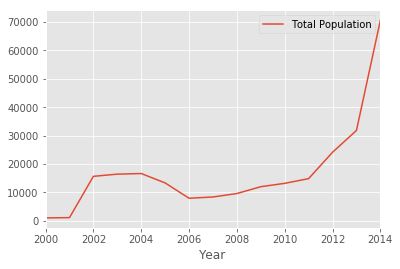

In [144]:
img_to_germany.plot(x='Year', y='Total Population')

In [145]:
img_to_france = imigration_data[(imigration_data['Country / territory of asylum/residence'] == 'France') 
                                & (imigration_data['Origin'] == 'Syrian Arab Rep.')]
img_to_france

Year Country / territory of asylum/residence            Origin  \
10896  1995                                  France  Syrian Arab Rep.   
12987  1996                                  France  Syrian Arab Rep.   
15252  1997                                  France  Syrian Arab Rep.   
18186  1998                                  France  Syrian Arab Rep.   
21168  1999                                  France  Syrian Arab Rep.   
24715  2000                                  France  Syrian Arab Rep.   
28886  2001                                  France  Syrian Arab Rep.   
33287  2002                                  France  Syrian Arab Rep.   
37842  2003                                  France  Syrian Arab Rep.   
42640  2004                                  France  Syrian Arab Rep.   
47591  2005                                  France  Syrian Arab Rep.   
52744  2006                                  France  Syrian Arab Rep.   
58083  2007                                  France  Syrian Arab Rep.   
63564  2008                                  France  Syrian Arab Rep.   
69150  2009                                  France  Syrian Arab Rep.   
74815  2010                                  France  Syrian Arab Rep.   
80719  2011                                  France  Syrian Arab Rep.   
86762  2012                                  France  Syrian Arab Rep.   
93023  2013                                  France  Syrian Arab Rep.   
99568  2014                                  France  Syrian Arab Rep.   

      Refugees (incl. refugee-like situations) Asylum-seekers (pending cases)  \
10896                                      213                            NaN   
12987                                      192                            NaN   
15252                                      196                            NaN   
18186                                      192                            NaN   
21168                                      174                            NaN   
24715                                      148                            NaN   
28886                                      192                            NaN   
33287                                      207                            NaN   
37842                                      191                            NaN   
42640                                      205                            NaN   
47591                                      213                            NaN   
52744                                      216                            NaN   
58083                                      217                              0   
63564                                      233                              0   
69150                                      244                              0   
74815                                      280                              0   
80719                                      351                              0   
86762                                      640                              0   
93023                                     1474                            343   
99568                                     2882                           1239   

      Returned refugees  Internally displaced persons (IDPs)  Returned IDPs  \
10896               NaN                                  NaN            NaN   
12987               NaN                                  NaN            NaN   
15252               NaN                                  NaN            NaN   
18186               NaN                                  NaN            NaN   
21168               NaN                                  NaN            NaN   
24715               NaN                                  NaN            NaN   
28886               NaN                                  NaN            NaN   
33287               NaN                                  NaN            NaN   
37842               NaN                                  NaN

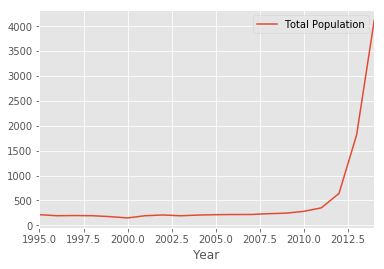

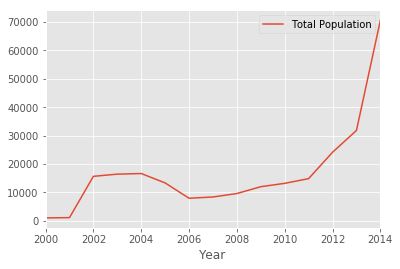

In [147]:
img_to_france.plot(x='Year', y='Total Population')
img_to_germany.plot(x='Year', y='Total Population')

In [148]:
 import matplotlib.pyplot as plt


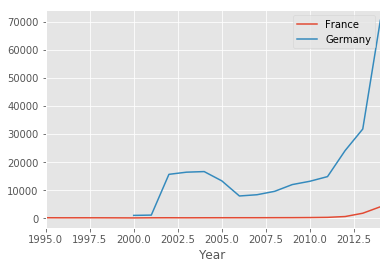

In [157]:
plt.figure()
ax = img_to_france.plot(x='Year', y='Total Population', label='France')
img_to_germany.plot(x='Year', y='Total Population', label='Germany', ax=ax)



## Stop repeating code!

In [164]:
img_to_france = imigration_data[(imigration_data['Country / territory of asylum/residence'] == 'France') 
                                & (imigration_data['Origin'] == 'Syrian Arab Rep.')]
img_to_france

def plot_two_countries(country_destiny='Germany', country_origin='Syrian Arab Rep.'):
    imigration_filtered =  imigration_data[(imigration_data['Country / territory of asylum/residence'] == country_destiny) 
                                & (imigration_data['Origin'] == country_origin)]
    imigration_filtered.plot(x='Year', y='Total Population', title="Origin: {}".format(country_origin), label=country_destiny)

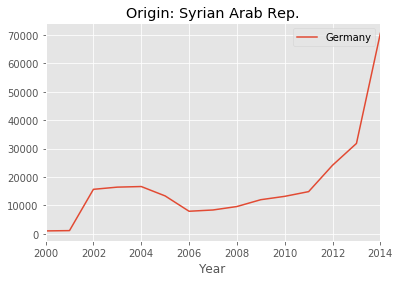

In [165]:
plot_two_countries()

In [167]:
!pip install seaborn

  Using cached seaborn-0.7.1.tar.gz
  Using cached scipy-0.19.0-cp35-cp35m-manylinux1_x86_64.whl
  Running setup.py bdist_wheel for seaborn ... - done
  Stored in directory: /home/walrus/.cache/pip/wheels/cb/c8/67/83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn
